<a href="https://colab.research.google.com/github/zuhurouf/ML-Foundation/blob/main/Supervised_ML_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Machine Learning?
> "Field of study that gives computers the ability to learn without being explitly programmed" - Arthur Samuel

### What is Supervised Learning?
**Supervised Learning** is a type of machine learning where the algorithms are trained by providing both the input `x` and the corresponding correct output `y` such that the algorithms can predict output for an unknown input data with atmost accuracy. There are two types of algorithms under supervised learning, those are:


1.   **Regression:** Predicting a number for a given input value
2.   **Classification:** Predicting the category/class of a given input



### What is Unsupervised Learning?
**Unsupervised Learning** is a type of machine learning where the algorithms are trained on data that has only the input `x` and doesn't have the correct output `y` to learn from. The objective of the algorithms will be to find structure or pattern in the given data. The different kinds of unsupervised learning are:


1.   **Clustering:** Grouping the input data into different clusters or groups
2.   **Anomaly detection:** Finding unusual data points in a given dataset
3.   **Dimensionality reduction:** Compressing a larger dataset to a smaller one without losing much information



## Linear Regression
A supervised regression algorithm which models a linear relationship between the input variables and the output variable. The linear relationship is defined as,</br>
$$
y => f_{w,b}(x) = wx + b
$$
where **f** is a function which takes in **x** (input feature) and based on the values of **w** and **b** obtained returns a prediction or an estimated value which is **y**

Here $f_{w,b}(x)$ is the mathematical modal of linear regression with one input variable. This function describes how the input variable is related to the output variable.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
w, b = 5, 7

f_x = lambda x: (w * x) + b

x: [ 2  5  9 12]
y: [25 36 78 45]


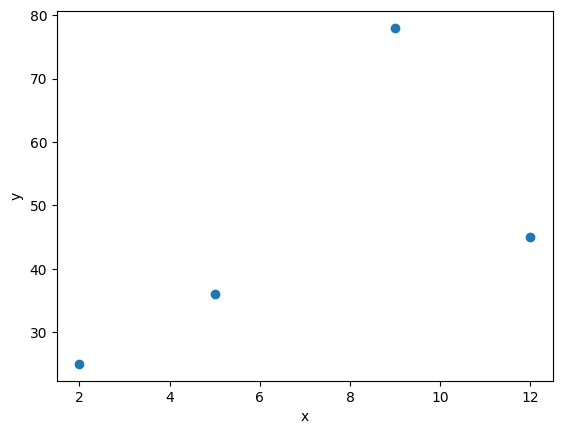

In [19]:
# Dummy data
x = np.array([2, 5, 9, 12])
y = np.array([25, 36, 78, 45])
data = {"x": x, "y": y}
print(f"x: {x}")
print(f"y: {y}")
plt.scatter(x = x, y = y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

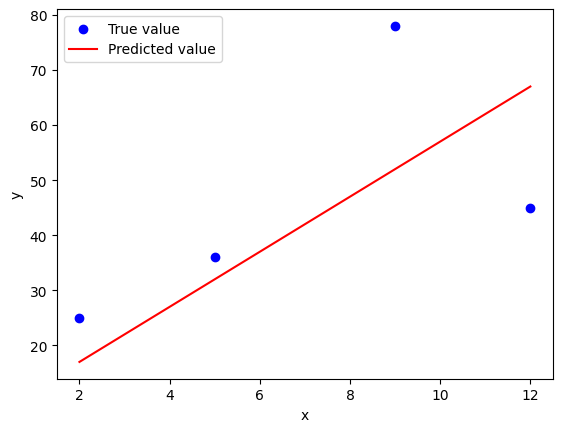

In [26]:
y_hat = [f_x(x_i) for x_i in x]
plt.scatter(x = x, y = y, label = "True value", color = "blue")
plt.plot(x, y_hat, c='red', label='Predicted value')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [25]:
print(f"For x = 7: {f_x(7)}")

For x = 7: 42


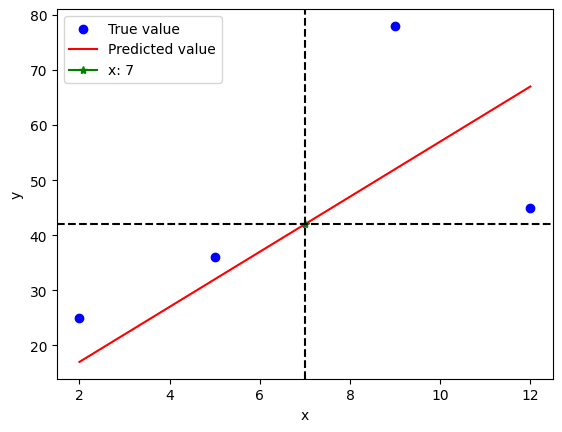

In [32]:
plt.scatter(x = x, y = y, label = "True value", color = "blue")
plt.plot(x, y_hat, c='red', label='Predicted value')
plt.plot(7, f_x(7), c = 'green', marker = "*", label = "x: 7")
plt.axvline(x = 7, color = 'black', linestyle = "--")
plt.axhline(y = f_x(7), color = 'black', linestyle = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()